In [1]:
import random
import numpy as np
import pandas as pd

#настройки, с которыми лучше
pd.set_option('display.max_rows', 45000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_colwidth', 5000)


In [2]:
# parameters
# salary
citizen_salary_parameter1=3
citizen_salary_parameter2=10

max_price=10000
min_qv=0

# разброс расходов
max_cost=100
min_cost=5

# разброс качества
max_qv=30
min_qv=2

# разброс капитала
cap_avarage=1000
cap_disp=300

# разброс инвестиций
capital_average=-100
capital_disp=50

# разброс изменений себестоимости
cost_average=0
cost_disp=3

# разброс изменений качества
qv_average=0
qv_disp=1

In [3]:
# класс продукта      
class product:
    def __init__(self, id=-1, quality=-100, price=-10000):
        self.id=id
        self.quality=quality
        self.price=price
        
    # отображаем все параметры в виду dataframe
    def to_df(self):
        df=pd.DataFrame(data=[self.__dict__.values()], columns=self.__dict__.keys())
        return df

In [4]:
round(0.123456789,6)

0.123457

In [5]:
# класс потребителя
class citizen:
    def __init__(self, id=0):
        # id
        self.id=id
        # стартовый капитал
        self.money=self.set_salary()
    
    # задаём схему по которой человек будет получать зарплату
    # все схемы на основе генератора случайных чисел
    def set_salary(self):
        # "коммунизм", у всех одинаковое случайное число
        # return round(random.randint(10, 100),2)
        # "развитой социализм", нормальное распределение, у большиснтва средняя зарплата
        #return round(random.normalvariate((100-10)/2, 10),2)
        # "современное общество", есть длинный правый хвост
        return round(random.gammavariate(citizen_salary_parameter1, citizen_salary_parameter2),2)
        
    # функция потребления продуктов
    # берём то, что можем позволить по деньгам
    # берём самый качественный, который можем
    # при равном качестве тот, что дешевле
    def consume(self, products):
        # возвращать будем продукт
        fun_result=product(id=-1)
        available_product_lst=[]
        # цикл для фильтрации тех, что не карману
        for pr in products:
            if self.money>=pr.price:
                available_product_lst.append(pr)
        
        best_price=max_price
        best_qv=min_qv
        # цикл поиска лучшего качества
        for pr in available_product_lst:
            if pr.quality>=best_qv:
                best_qv=pr.quality
        
        product_qv_lst=[]
        # сбор всех продуктов лучшего качества
        for pr in available_product_lst:
            if pr.quality==best_qv:
                product_qv_lst.append(pr)
        
        # выбор из них тех, что дешевле
        for pr in product_qv_lst:
            if pr.price<=best_price:
                best_price=pr.price
        
        # вывод продукта с лучшими характеристиками
        for pr in product_qv_lst:
            if pr.price==best_price:
                fun_result=pr
                break
        
        return fun_result 
    
    # отображаем все параметры в виду dataframe
    def to_df(self):
        df=pd.DataFrame(data=[self.__dict__.values()], columns=self.__dict__.keys())
        return df
    

In [6]:
# класс фабрики        
class factory:
    def __init__(self, id=-1):
        # id
        self.id=id
        # предел качества продукта, меньше - можно
        self.max_quality=self.set_params()[0]
        # себестоимость
        self.cost=self.set_params()[1]
        # деньги у завода
        self.capital=self.set_params()[2]
        # продажи текущего периода
        self.pur=0
        # цена продажи текущего периода
        self.price=0
        self.capital_history=[]
        self.cost_history=[]
        self.quality_history=[]
        self.pur_history=[]
        self.price_history=[]
        self.history=pd.DataFrame()
        
    def set_params(self):
        max_quality=round(random.randint(min_qv, max_qv),0)
        selcost=round(random.randint(min_cost, max_cost),2)
        capital=round(random.normalvariate(cap_avarage, cap_disp),2)
        
        return max_quality, selcost, capital
        
    # функция проверки кредитоспособности
    def check(self):
        if self.capital<=0:
            return -1
        else:
            return 0

    #  функция производтсва
    def produce(self, product_id, price, quality):
        # если норм по капиталам, себестоимости и производственным мощностям, то вперёд
        if (price>self.cost) and (quality<=self.max_quality) and (self.check()==0):
            self.price=price
            return product(id=product_id, quality=quality, price=price)
        else:
            self.price=-10000
            return product(id=-1)
        
    # функкция сделки
    def trade(self):
        # расходы на производство считаем здесь, чтобы не заморачиваться пока остатками
        self.capital=self.capital-self.cost
        if self.check()==0:
            # поднимаем счётчики
            self.pur=self.pur+1
            self.capital=self.capital+self.price
        else:
            pass
        
    # храним историю продаж, запускаем в конце цикла
    def hist(self):#, period):
        self.capital_history.append(self.capital)
        self.cost_history.append(self.cost)
        self.quality_history.append(self.max_quality)
        self.pur_history.append(self.pur)
        self.price_history.append(self.price)
        
    def get_modern_params(self):
        capital_addon=round(random.normalvariate(capital_average, capital_disp),2)
        if capital_addon>0:
            capital_addon=-10
        cost_addon=round(random.normalvariate(cost_average, cost_disp),2)
        qv_addon=round(random.normalvariate(qv_average, qv_disp),0)
        
        return qv_addon, cost_addon, capital_addon
    
    def modernise_proces(self,qv_addon, cost_addon, capital_addon):
        if (self.capital+capital_addon>0):
            if self.max_quality+qv_addon>0:
                self.max_quality=self.max_quality+qv_addon
            if self.cost+cost_addon>0:
                self.cost=self.cost+cost_addon
            self.capital=self.capital+capital_addon
        else:
            pass
    
    # функция модернизации
    def modernise(self):
        # получили параметры модернизации
        qv_addon, cost_addon, capital_addon=self.get_modern_params()
        
        # если раунд не первый, то
        if len(self.pur_history)>1:
            # если сейчас продаж нет, а раньше были, то откатываемся
            if (self.pur==0)&(self.pur_history[-1]>0):
                print('1')
                self.max_quality=self.quality_history[-1]
                self.cost=self.cost_history[-1]
            else: 
                print('2')
                self.modernise_proces(qv_addon, cost_addon, capital_addon)
        # на первом раунде все модернизируются
        else: 
            print('3')
            self.modernise_proces(qv_addon, cost_addon, capital_addon)



    def to_null(self):
        # обнуляем счётчики текущего цикла
        self.price=0
        self.pur=0
    
    # отображаем все параметры в виду dataframe
    def to_df(self):
        df=pd.DataFrame(data=[self.__dict__.values()], columns=self.__dict__.keys())
        df=df.drop(columns=['history'])
        return df

In [7]:
# базовые тест
# проверяем, что продукт создаётся
pr_a_df=product(id=0).to_df()
pr_b_df=product(id=1, quality=50, price=99).to_df()

# проверяем, что житель создаётся
cit_a_df=citizen(id=0).to_df()

# проверяем распредление зарплат жителей
N=50
cit_lst=[]
cit_df=pd.DataFrame()
for i in range(N):
    cit=citizen(id=i)
    cit_lst.append(cit)
    cit_df=pd.concat([cit_df, cit.to_df()])
    
# проверяем функцию потребления
# житель для теста
cit_a=citizen(id=1)
cit_a.money=30
# выбор самого дешёго продукта равного качества
pr_a1=product(id=0, quality=10, price=20)
pr_a2=product(id=1, quality=10, price=30)
pr_a3=product(id=2, quality=10, price=40)
# выбор самого качественного продукта одной цены
pr_b1=product(id=3, quality=10, price=20)
pr_b2=product(id=4, quality=20, price=20)
pr_b3=product(id=5, quality=30, price=20)
# выбор оптимального доступного
pr_c1=product(id=6, quality=10, price=10)
pr_c2=product(id=7, quality=30, price=30)
pr_c3=product(id=8, quality=50, price=50)

# проверяем создаем завода
fact_a_df=factory(id=0).to_df()

# проверяем распредление параметров завода
n=10
fact_lst=[]
fact_df=pd.DataFrame()
for i in range(n):
    f=factory(id=i)
    fact_lst.append(f)
    fact_df=pd.concat([fact_df, f.to_df()])

# проверяем функцию производства
# завод для теста
fact_ap1=factory(id=1)
fact_ap1.max_quality=40
fact_ap1.cost=10
fact_ap1.capital=300
# проверка условия по себестоимости
pr1=fact_ap1.produce(202, price=20, quality=30)
pr2=fact_ap1.produce(203, price=10, quality=30)
pr3=fact_ap1.produce(203, price=9, quality=30)
# проверка условия по качеству
pr4=fact_ap1.produce(203, price=20, quality=10)
pr5=fact_ap1.produce(203, price=20, quality=30)
pr6=fact_ap1.produce(203, price=20, quality=50)

# проверяем функцию продажи
# продаём товар один раз
fact_tr1=factory(id=7)
fact_tr1.cost=10
fact_tr1.max_quality=15
fact_tr1.capital=300
fact_tr1.produce(product_id=18, price=20, quality=15)
fact_tr1.trade()

# пытаемся продать товар, когда у нас мало капитала
fact_tr2=factory(id=8)
fact_tr2.cost=10
fact_tr2.max_quality=15
fact_tr2.capital=5
fact_tr2.produce(product_id=18, price=20, quality=15)
fact_tr2.trade()

# тестируем функцию логирования
ht=factory(id=21)
ht.hist()
ht.capital=300
ht.hist()
ht.capital=350
ht.hist()

# массив заводов, покупки и логирование
n=5
fact_h_lst=[]
for i in range(n):
    f=factory(id=i)
    f.capital=300
    f.cost=10
    f.produce(product_id=i, price=11, quality=1)
    fact_h_lst.append(f)

for i in range(n):    
    for j in range(4):
        fact_h_lst[i].trade()
        fact_h_lst[i].hist()
        
# проверяем рандом параметров
t=factory(id=31)
nn=500
params_lst=[]
for i in range(nn):
    pl=t.get_modern_params()
    params_lst.append(pl)
params_df=pd.DataFrame(params_lst)
params_df.columns=['qv_addon', 'cost_addon', 'capital_addon']

In [8]:
pr_a_df #id=0 qv=-100 price=-10000

,id,quality,price
0,0,-100,-10000


In [9]:
pr_b_df #id=1 qv=50 price=99

,id,quality,price
0,1,50,99


In [10]:
cit_a_df #id=0 money=rand

,id,money
0,0,33.08


In [11]:
cit_df['money'].hist()

In [12]:
cit_a.consume([pr_a1, pr_a2, pr_a3]).to_df()  #id=0

,id,quality,price
0,0,10,20


In [13]:
cit_a.consume([pr_b1, pr_b2, pr_b3]).to_df() #id=5

,id,quality,price
0,5,30,20


In [14]:
cit_a.consume([pr_c1, pr_c2, pr_c3]).to_df() #id=7

,id,quality,price
0,7,30,30


In [15]:
fact_a_df #id=0, all rand or empty

,id,max_quality,cost,capital,pur,price,capital_history,cost_history,quality_history,pur_history,price_history
0,0,11,57,1511.56,0,0,[],[],[],[],[]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d2f9dee80>,
      dtype=object)

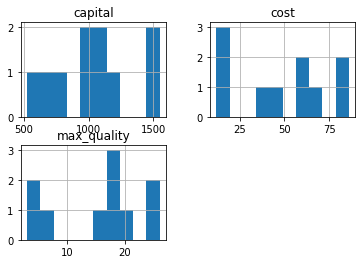

In [16]:
fact_df[['max_quality', 'cost', 'capital']].hist()

In [17]:
pr1.to_df() #id>0

,id,quality,price
0,202,30,20


In [18]:
pr2.to_df() #id<0

,id,quality,price
0,-1,-100,-10000


In [19]:
pr3.to_df() #id<0

,id,quality,price
0,-1,-100,-10000


In [20]:
pr4.to_df() #id>0

,id,quality,price
0,203,10,20


In [21]:
pr5.to_df() #id>0

,id,quality,price
0,203,30,20


In [22]:
pr6.to_df() #id<0

,id,quality,price
0,-1,-100,-10000


In [23]:
fact_tr1.to_df()  #capital=310 pur=1

,id,max_quality,cost,capital,pur,price,capital_history,cost_history,quality_history,pur_history,price_history
0,7,15,10,310,1,20,[],[],[],[],[]


In [24]:
fact_tr2.to_df()  #capital=-5 pur=0

,id,max_quality,cost,capital,pur,price,capital_history,cost_history,quality_history,pur_history,price_history
0,8,15,10,-5,0,20,[],[],[],[],[]


In [25]:
ht.to_df() # capital_hist=[rand, 300, 350]

,id,max_quality,cost,capital,pur,price,capital_history,cost_history,quality_history,pur_history,price_history
0,21,5,22,350,0,0,"[487.36, 300, 350]","[22, 22, 22]","[5, 5, 5]","[0, 0, 0]","[0, 0, 0]"


In [26]:
fact_h_lst[2].to_df()  #capital_history=[301, 302, 303, 304] pur=4

,id,max_quality,cost,capital,pur,price,capital_history,cost_history,quality_history,pur_history,price_history
0,2,21,10,304,4,11,"[301, 302, 303, 304]","[10, 10, 10, 10]","[21, 21, 21, 21]","[1, 2, 3, 4]","[11, 11, 11, 11]"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d2f8458d0>,
      dtype=object)

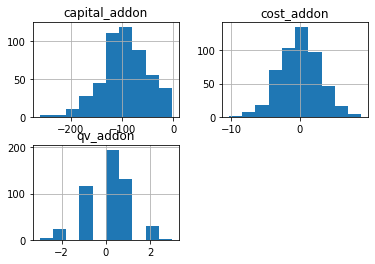

In [27]:
params_df.hist()

In [28]:
len(params_df[params_df['capital_addon']>0])/len(params_df)  # 0

0.0

In [34]:
# продажи были - модернизировались, продажи пропали
fact_tr31=factory(id=31)
fact_tr31.cost=10
fact_tr31.max_quality=15
fact_tr31.capital=300
fact_tr31.produce(product_id=31, price=11, quality=15)

fact_tr31.trade()
fact_tr31.hist()
fact_tr31.modernise()
fact_tr31.hist()
fact_tr31.to_null()
fact_tr31.modernise()
fact_tr31.hist()

# продажи были - модернизировались, продажи остались
fact_tr32=factory(id=31)
fact_tr32.cost=10
fact_tr32.max_quality=15
fact_tr32.capital=300
fact_tr32.produce(product_id=31, price=11, quality=15)

fact_tr32.trade()
fact_tr32.hist()
fact_tr32.modernise()
fact_tr32.trade()
fact_tr32.hist()
fact_tr32.modernise()
fact_tr32.hist()

# продажи не было - модернизировались, продажи появились
fact_tr33=factory(id=31)
fact_tr33.cost=10
fact_tr33.max_quality=15
fact_tr33.capital=300
fact_tr33.produce(product_id=31, price=11, quality=15)

fact_tr33.hist()
fact_tr33.modernise()
fact_tr33.trade()
fact_tr33.hist()
fact_tr33.modernise()
fact_tr33.hist()

# продажи не было - модернизировались, продажи не появились
fact_tr34=factory(id=31)
fact_tr34.cost=10
fact_tr34.max_quality=15
fact_tr34.capital=300
fact_tr34.produce(product_id=31, price=11, quality=15)

fact_tr34.hist()
fact_tr34.modernise()
fact_tr34.hist()
fact_tr34.modernise()
fact_tr34.hist()



3
1
3
2
3
2
3
2


In [35]:
fact_tr31.to_df()

,id,max_quality,cost,capital,pur,price,capital_history,cost_history,quality_history,pur_history,price_history
0,31,14.0,11.15,219.88,0,0,"[301, 219.88, 219.88]","[10, 11.15, 11.15]","[15, 14.0, 14.0]","[1, 1, 0]","[11, 11, 0]"


In [36]:
fact_tr32.to_df()

,id,max_quality,cost,capital,pur,price,capital_history,cost_history,quality_history,pur_history,price_history
0,31,15.0,10.44,51.39,2,11,"[301, 148.32, 51.389999999999986]","[10, 10.06, 10.440000000000001]","[15, 15.0, 15.0]","[1, 2, 2]","[11, 11, 11]"


In [37]:
fact_tr33.to_df()

,id,max_quality,cost,capital,pur,price,capital_history,cost_history,quality_history,pur_history,price_history
0,31,17.0,4.73,171.8,1,11,"[300, 295.53, 171.79999999999995]","[10, 5.47, 4.7299999999999995]","[15, 17.0, 17.0]","[0, 1, 1]","[11, 11, 11]"


In [38]:
fact_tr34.to_df()

,id,max_quality,cost,capital,pur,price,capital_history,cost_history,quality_history,pur_history,price_history
0,31,16.0,3.93,160.53,0,11,"[300, 229.17000000000002, 160.53000000000003]","[10, 6.52, 3.9299999999999997]","[15, 16.0, 16.0]","[0, 0, 0]","[11, 11, 11]"
